##### this approach only looks at sequential information with in the fonts

In [3]:
import glob
from shutil import rmtree
from tqdm import tqdm

grobid_files = glob.glob("/Users/mv96/Downloads/ACM_Multimedia/dest-pdfs/**/data.csv")
len(grobid_files)

167

In [1]:
# loading the preprcessed dataset
import pandas as pd

df = pd.read_csv("/Users/mv96/Desktop/dataset_tkb/test.csv")

useful = df[["pdf_alto_text", "fonts", "pdf_path", "label"]]
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'page_no', 'top_left', 'bot_right',
       'grobid_text', 'pdf_alto_text', 'fonts', 'label', 'Normal',
       'Superscipt', 'Subscript', 'italics', 'bold', 'is_Proportional',
       'is_Serif', 'font_color_red', 'font_color_green', 'font_color_blue',
       'is_bold_manual', 'is_italic_manual', 'is_serif_manual',
       'is_math_manual', 'new_font_size', 'pdf_path'],
      dtype='object')


In [2]:
# drop nan columns
df = df.dropna()

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,page_no,top_left,bot_right,grobid_text,pdf_alto_text,fonts,label,Normal,...,is_Serif,font_color_red,font_color_green,font_color_blue,is_bold_manual,is_italic_manual,is_serif_manual,is_math_manual,new_font_size,pdf_path
0,36,36,6.0,"(200.03563410896913, 1224.9484944798717)","(675, 1866)",Fact 6 Let G be a graph and let f (v) ≥ n/g(n)...,['Fact[~end_of_font~] 6[~end_of_font~] Let[~en...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.627877,0.248082,0.627877,0.051151,0.249075,1812.02037/journal-factor.pdf
1,40,40,7.0,"(200.03563410896913, 711.6682345668228)","(675, 1866)",Fact 8 Let S be a subset of E(G).An f -factor ...,['Fact[~end_of_font~] 8[~end_of_font~] Let[~en...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.857143,0.142857,0.857143,0.000000,0.249075,1812.02037/journal-factor.pdf
2,43,43,7.0,"(200.03563410896913, 1565.7368010805071)","(675, 1866)",Let A be an alternating circuit and S be a sub...,['Fact[~end_of_font~] 11[~end_of_font~] Let[~e...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.866953,0.088816,0.866953,0.044231,0.249075,1812.02037/journal-factor.pdf
3,45,45,8.0,"(200.03563410896913, 255.4592491550138)","(675, 1866)",Fact 12 Let H be an f -factor of G and let Q b...,['Fact[~end_of_font~] 12[~end_of_font~] Let[~e...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.772727,0.181818,0.772727,0.045455,0.249075,1812.02037/journal-factor.pdf
4,52,52,8.0,"(200.03563410896913, 1610.1379192173042)","(675, 1866)",Observation 14 Let G be an undirected graph an...,['Observation[~end_of_font~] 14[~end_of_font~]...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.578947,0.210526,0.578947,0.105263,0.249075,1812.02037/journal-factor.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388804,13,13,3.0,"(241.1818527361057, 480.18781204012924)","(840, 2132)","1. If w ∈ L then 2 3 ≤ g(w) f (w) ≤ 1, 2. If w...",['1.[~end_of_font~] If[~end_of_font~] w[~end_o...,['font1 font1 font11 font14 font11 font1 ...,theorem,0.753401,...,0.0,0.0,0.0,0.0,0.000000,0.278912,0.000000,0.187075,0.260075,1602.06073/main.pdf
388805,14,14,3.0,"(200.03563410896913, 657.097648821723)","(840, 2132)","Here, FP is the class of functions from bit st...","['Here,[~end_of_font~] FP[~end_of_font~] is[~e...",['font1 font1 font1 font1 font1 font1 fo...,theorem,0.855903,...,0.0,0.0,0.0,0.0,0.000000,0.080109,0.000000,0.023438,0.284519,1602.06073/main.pdf
388806,18,18,4.0,"(200.03563410896913, 795.191239021899)","(840, 2132)","Theorem 1.For any group oracle B = {B n }, the...",['Theorem[~end_of_font~] 1.[~end_of_font~] For...,['font16 font16 font2 font2 font2 font2 ...,theorem,0.907005,...,0.0,0.0,0.0,0.0,0.055556,0.746377,0.055556,0.105072,0.289610,1602.06073/main.pdf
388807,19,19,4.0,"(200.03563410896913, 906.0551072107728)","(840, 2132)","H ≡ g 1 , ..., g k in time polynomial in n+log...",['H[~end_of_font~] ≡[~end_of_font~]g[~end_of_f...,['font11 font14 font11 font12 font11 font11 ...,theorem,0.710417,...,0.0,0.0,0.0,0.0,0.000000,0.420833,0.000000,0.229167,0.270025,1602.06073/main.pdf


In [18]:
import ast


def apply_convert_in_list(val):
    list_fonts = ast.literal_eval(val)
    filtered = list(
        filter(lambda x: x.startswith("font"), "".join(list_fonts).strip().split(" "))
    )
    return filtered


def continuous_fonts_clubbed(val):
    """clubs fonts that are together in a group sequence"""
    fonts_unique_order = []
    for font in val:
        try:
            last_font = fonts_unique_order[-1]
        except:
            fonts_unique_order.append(font)
            continue
        if font != last_font:
            fonts_unique_order.append(font)

    return fonts_unique_order


df["fonts"] = df["fonts"].apply(apply_convert_in_list)
df["fonts"] = df["fonts"].apply(continuous_fonts_clubbed)
df["fonts"]

0         [font0, font6, font0, font6, font7, font8, fon...
1         [font0, font6, font0, font6, font0, font6, fon...
2         [font0, font6, font0, font6, font0, font6, fon...
3         [font0, font6, font0, font6, font0, font6, fon...
4         [font0, font6, font0, font6, font0, font6, fon...
                                ...                        
388804    [font1, font11, font14, font11, font1, font17,...
388805    [font1, font11, font1, font15, font1, font11, ...
388806    [font16, font2, font11, font1, font14, font13,...
388807    [font11, font14, font11, font12, font11, font1...
388808    [font16, font2, font11, font14, font1, font2, ...
Name: fonts, Length: 385368, dtype: object

In [19]:
df["fonts"].iloc[0]

['font0',
 'font6',
 'font0',
 'font6',
 'font7',
 'font8',
 'font6',
 'font0',
 'font6',
 'font0',
 'font6',
 'font7',
 'font0',
 'font6',
 'font0',
 'font6',
 'font0',
 'font6',
 'font0',
 'font6',
 'font0',
 'font6',
 'font8',
 'font7']

In [8]:
test = pd.DataFrame(df["fonts"].apply(len))
test.describe()

,fonts
count,385368.000000
mean,21.605273
std,25.883494
min,0.000000
25%,5.000000
50%,14.000000
75%,28.000000
max,1430.000000


In [9]:
# paragraphs that use more than thresh set unique/not unique types of different fonts
thresh = 1000
print(len(df["fonts"][df["fonts"].apply(len) > thresh]))
more_number_of_font = df[df["fonts"].apply(len) > thresh][
    ["fonts", "pdf_path", "label"]
]
more_number_of_font

3


,fonts,pdf_path,label
67196,"[font11, font20, font11, font20, font10, font1...",1712.06239/main.pdf,basic
67202,"[font11, font20, font11, font20, font10, font1...",1712.06239/main.pdf,basic
79587,"[font4, font3, font5, font6, font7, font8, fon...",2002.09534/minesweep-arxiv.pdf,basic


In [ ]:
# apply a function that corrects the font name
from bs4 import BeautifulSoup as bs
import os
import string
from functools import lru_cache
from tqdm import tqdm
import sys


@lru_cache(maxsize=20)
def get_all_font_names(
    font_path, strip_digits=True, dest_path="/Users/mv96/new/dest-pdfs"
):
    """should return a dictionary to all font names"""
    xml_path = font_path.replace(".pdf", ".xml")
    location_xml = os.path.join(dest_path, xml_path)

    # go and read this location file using bs4 and get all the styles
    with open(location_xml, "r") as file:
        # Read each line in the file, readlines() returns a list of lines
        content = file.readlines()
        # Combine the lines in the list into a string
        content = "".join(content)
        bs_content = bs(content, "xml")
        file.close()

    all_text_styles = bs_content.Styles.find_all("TextStyle")
    if strip_digits:
        font_familys = list(
            map(lambda x: x.get("FONTFAMILY").rstrip(string.digits), all_text_styles)
        )
    else:
        font_familys = list(map(lambda x: x.get("FONTFAMILY"), all_text_styles))
    font_name__font_family = {}
    for i, element in enumerate(font_familys):
        font_name__font_family["font" + str(i)] = element

    # strip the last digits
    return font_name__font_family
    # print(bs_content.Styles.find_all("TextStyle")[0].get("FONTFAMILY")) #gives the entire list


def font_number_to_real_name(
    sequence, font_path, strip_digits=True, dest_path="/Users/mv96/new/dest-pdfs"
):
    try:
        font_mappings = get_all_font_names(font_path, strip_digits=strip_digits)
        if font_mappings is None:
            return None
        real_sequence = []
        for font in sequence:
            real_sequence.append(font_mappings[font])
        return (sequence, font_path, real_sequence)
    except KeyboardInterrupt:
        print("Interrupted")
        return "break"
    except:
        return None


# parellelizing the operations
from joblib import Parallel, delayed

n_jobs = 1

res = Parallel(n_jobs=n_jobs)(
    delayed(font_number_to_real_name)(row["fonts"], row["pdf_path"])
    for ind, row in tqdm(df.iterrows())
)

In [ ]:
temp = pd.DataFrame(res, columns=["local font name", "pdf_path", "font"])
temp

In [ ]:
label = df["label"].reset_index()
lstm_df = pd.concat([temp, label["label"]], axis=1)
lstm_df
lstm_df.to_csv("/Users/mv96/Desktop/prep_lstm_stripped.csv")

In [10]:
lstm_df = pd.read_csv("/Users/mv96/Desktop/prep_lstm_stripped.csv")

In [11]:
lstm_df["label"].value_counts()

basic      194895
proof      123010
theorem     67463
Name: label, dtype: int64

# test tensorflow installation for M1 Mac

In [12]:
import tensorflow as tf

print(tf.__version__)
tf.config.list_physical_devices()

2.6.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [13]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tf.enable_v2_behavior()

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()


(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.0, label


batch_size = 128

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        #   tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        #   tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"],
)

model.fit(
    ds_train,
    epochs=12,
    validation_data=ds_test,
)

2022-01-27 23:00:59.469835: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-27 23:00:59.687210: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Train on 469 steps, validate on 79 steps
Epoch 1/12
468/469 [============================>.] - ETA: 0s - batch: 233.5000 - size: 1.0000 - loss: 0.1583 - accuracy: 0.9520

/Users/mv96/miniforge3/lib/python3.9/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


469/469 [==============================] - 27s 55ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.1580 - accuracy: 0.9520 - val_loss: 0.0616 - val_accuracy: 0.9783
Epoch 2/12
469/469 [==============================] - 26s 53ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 3/12
469/469 [==============================] - 27s 55ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0357 - val_accuracy: 0.9878
Epoch 4/12
469/469 [==============================] - 27s 56ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 5/12
469/469 [==============================] - 26s 54ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 6/12
469/469 [==============================] - 27s 56ms/step - batch: 234.0000 - size: 1.0000 - loss: 0.0086 - accuracy

KeyboardInterrupt: 

# LSTM implementation

In [14]:
import pandas as pd

# for unstripped use /Users/mv96/Desktop/prep_lstm_unstripped.csv
# for stripped /Users/mv96/Desktop/prep_lstm.csv
lstm_df = pd.read_csv("/Users/mv96/Desktop/prep_lstm_unstripped.csv")
lstm_df

,Unnamed: 0,local font name,pdf_path,font,label
0,0,"['font0', 'font6', 'font0', 'font6', 'font7', ...",1812.02037/journal-factor.pdf,"['nimbusromno9l', 'cmmi10', 'nimbusromno9l', '...",theorem
1,1,"['font0', 'font6', 'font0', 'font6', 'font0', ...",1812.02037/journal-factor.pdf,"['nimbusromno9l', 'cmmi10', 'nimbusromno9l', '...",theorem
2,2,"['font0', 'font6', 'font0', 'font6', 'font0', ...",1812.02037/journal-factor.pdf,"['nimbusromno9l', 'cmmi10', 'nimbusromno9l', '...",theorem
3,3,"['font0', 'font6', 'font0', 'font6', 'font0', ...",1812.02037/journal-factor.pdf,"['nimbusromno9l', 'cmmi10', 'nimbusromno9l', '...",theorem
4,4,"['font0', 'font6', 'font0', 'font6', 'font0', ...",1812.02037/journal-factor.pdf,"['nimbusromno9l', 'cmmi10', 'nimbusromno9l', '...",theorem
...,...,...,...,...,...
385363,385363,"['font1', 'font11', 'font14', 'font11', 'font1...",1602.06073/main.pdf,"['cmr12', 'cmmi12', 'cmsy10', 'cmmi12', 'cmr12...",theorem
385364,385364,"['font1', 'font11', 'font1', 'font15', 'font1'...",1602.06073/main.pdf,"['cmr12', 'cmmi12', 'cmr12', 'cmmi8', 'cmr12',...",theorem
385365,385365,"['font16', 'font2', 'font11', 'font1', 'font14...",1602.06073/main.pdf,"['cmbx12', 'cmti12', 'cmmi12', 'cmr12', 'cmsy1...",theorem
385366,385366,"['font11', 'font14', 'font11', 'font12', 'font...",1602.06073/main.pdf,"['cmmi12', 'cmsy10', 'cmmi12', 'cmr8', 'cmmi12...",theorem


In [15]:
# filter out the unnamed section of columns
for column_name in lstm_df.columns:
    if column_name.startswith("Unnamed:"):
        lstm_df = lstm_df.drop(column_name, 1)

# now we will filter the nan rows in the dataset
lstm_df = lstm_df.dropna()

/var/folders/tm/9klk1nzn2lz690wvdfb85s_00000gn/T/ipykernel_52051/417036697.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  lstm_df = lstm_df.drop(column_name, 1)


<AxesSubplot:>

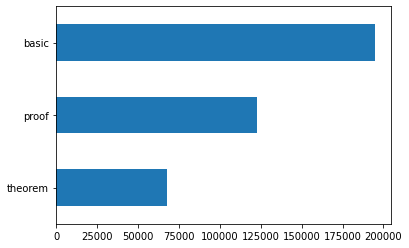

In [16]:
# lets now visualize the dataframe that we got
# class imbalance in the data
lstm_df["label"].value_counts().sort_values().plot(kind="barh")

In [17]:
lstm_df["label"].value_counts()

basic      194895
proof      123010
theorem     67463
Name: label, dtype: int64

In [22]:
import ast


def string_mapping(val):
    """converts the list format into string format that can be used for LSTM input as positional encoding"""
    temp = ast.literal_eval(val)
    return " ".join(temp)


lstm_df["font"] = lstm_df["font"].apply(string_mapping)

# train test(0.10) split

In [23]:
X = lstm_df["font"]
y = lstm_df["label"]

# divide the dataset into test and train portions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

print(X.shape, y.shape)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(385368,) (385368,)
(346831,) (38537,) (346831,) (38537,)


In [24]:
y_train.value_counts()

basic      175405
proof      110709
theorem     60717
Name: label, dtype: int64

In [29]:
print(X_train.iloc[0], y_train.iloc[0])

cmr10 cmmi10 tex cmr10 proof


In [30]:
# label encoding the data
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)

print("The classes obtained")
print(le.classes_)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

print(type(X_train))
print(X_train.iloc[1])

The classes obtained
['basic' 'proof' 'theorem']
<class 'pandas.core.series.Series'>
nimbusromno9l cmmi10 cmmi8 cmr10 cmsy8 cmr6 cmr10 cmmi10 nimbusromno9l cmmi10 cmmi8 cmr10 cmsy8 cmr6 cmr10 cmmi10 nimbusromno9l cmmi10 cmmi8 cmr10 cmmi8 cmmi10 cmmi8 cmmi10 cmmi8 nimbusromno9l cmr10 cmsy8 cmr6 nimbusromno9l cmr10 cmsy8 cmr6 nimbusromno9l cmr8 cmsy8 nimbusromno9l cmmi10 cmsy10 msbm10 cmsy8 nimbusromno9l cmmi10 cmr8 cmr10 cmsy10 cmmi10 cmsy8 cmmi8 cmsy10 nimbusromno9l


In [31]:
print(le.transform(["basic", "proof", "theorem"]))
print(le.inverse_transform([0, 1, 2]))

[0 1 2]
['basic' 'proof' 'theorem']


In [48]:
# set a threshold that almost always covers most of the paragraphs
from tqdm import tqdm

thresh = 1000
cnt = 0
for ind, row in tqdm(lstm_df.iterrows()):
    fonts_used = row["font"]
    unique_fonts_used = set(fonts_used.split(" "))

    label_of_para = row["label"]
    if len(fonts_used) > thresh:
        cnt += 1
        # print(label_of_para)
        # print(fonts_used)

print(cnt)
# around 1800 blocks that use more than a thousand font sequence

385368it [00:06, 56045.14it/s]

3110


In [49]:
# some blocks can have large number of occurances

In [50]:
# total number of fonts that exist in both training and testing data

temp = list(set(" ".join(X_train).split(" ")))
print(len(temp))  # 221 fonts roughly

379


In [51]:
# fonts that occur in train but not in test
temp1 = list(set(" ".join(X_test).split(" ")))
print(len(temp1))  # 159 fonts roughly

fonts_not_in_train = []
for font in temp1:
    if font not in temp:
        fonts_not_in_train.append(font)

print(fonts_not_in_train)
print(len(fonts_not_in_train))  # not a heavy loss

288
['sfsx1440', 'sfrm1728', 'apple', 'mnsymbol', 'sfbx2074', 'grmn0700']
6


In [52]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

X_train = X_train.to_list()
X_test = X_test.to_list()

print(type(X_train), type(X_test))

(346831,) (38537,)
(346831,) (38537,)
<class 'list'> <class 'list'>


In [53]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

top_words = 500
max_length = 1000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
list_tokenized_train = tokenizer.texts_to_sequences(X_train)

# for bert max length is 512
X_train = pad_sequences(list_tokenized_train, maxlen=max_length)

In [54]:
X_train.shape

(346831, 1000)

In [55]:
tokenizer.fit_on_texts(X_test)
list_tokenized_train = tokenizer.texts_to_sequences(X_test)

# for bert max length is 512
X_test = pad_sequences(list_tokenized_train, maxlen=max_length)

In [56]:
X_test.shape

(38537, 1000)

In [57]:
import pandas as pd

Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# This is fixed.


EMBEDDING_DIM = 32  ####hyper parameter

model = Sequential()

model.add(Embedding(top_words, EMBEDDING_DIM, input_length=X_train.shape[1]))

model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2))  # for cudadnn set rec dropout as 0
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          16000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1000, 32)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 69,503
Trainable params: 69,503
Non-trainable params: 0
_________________________________________________________________


In [59]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(346831, 1000)
(346831, 3)
(38537, 1000)
(38537, 3)


In [ ]:
# without classs weights
epochs = 30  # hyper parameter
batch_size = 64  # number of training samples to push through
history = model.fit(
    X_train,
    Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, Y_test),
    callbacks=[
        EarlyStopping(monitor="val_loss", mode="min", patience=3, min_delta=0.0001)
    ],
)

In [ ]:
accr = model.evaluate(X_test, Y_test)
print("Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}".format(accr[0], accr[1]))